Resultado
Frequências de pico detectadas: 15.12 Hz e 40.31 Hz
Amplitudes de pico detectadas: 0.80 e 1.02


/tmp/ipython-input-6-1055301477.py:90: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


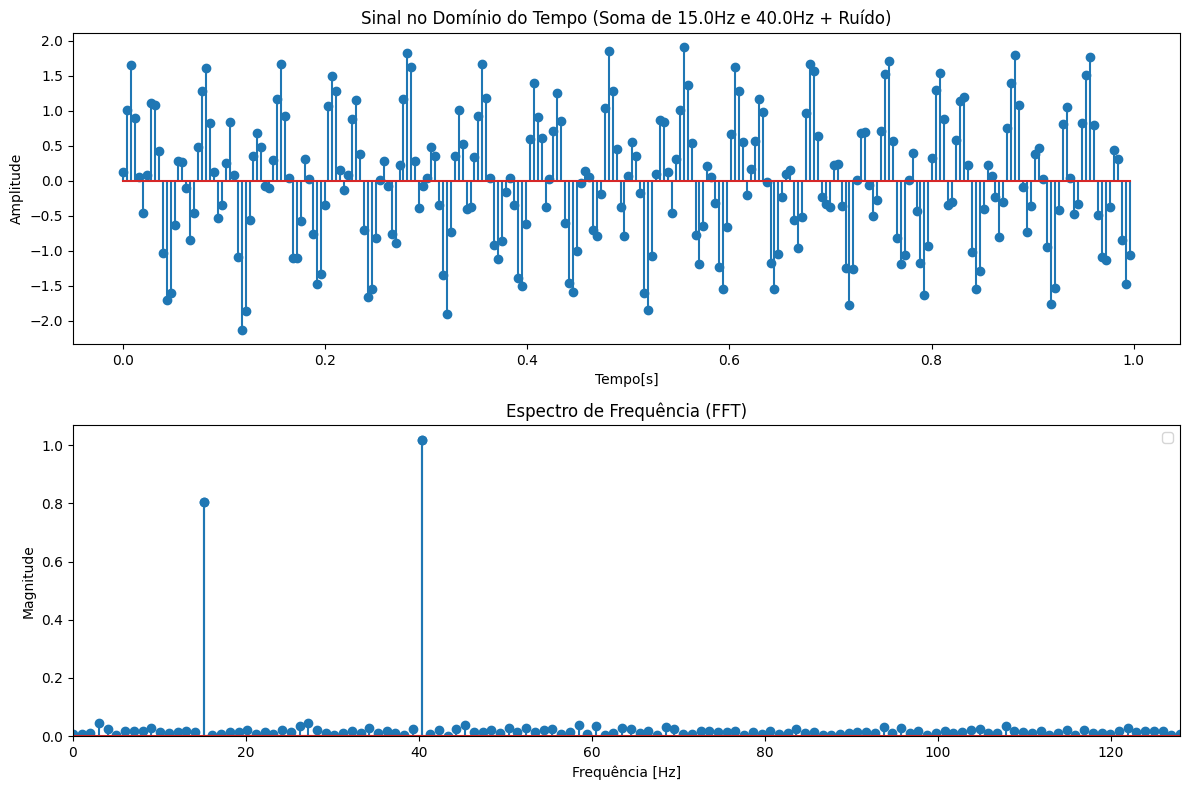

In [6]:
#ALUNO: JOSÉ IVINES MATOS SILVA
#DICSCIPLINA: PROCESSAMENTO DIGITAL DE SINAIS
#OBJETIVO DO CÓDIGO:IMPLEMENTAÇÃO DA TRANSFORMADA RÁPIDA DE FOURIER (FFT)

import numpy as np
import matplotlib.pyplot as plt

def fft_recursiva(x):

    N = len(x)

    if N & (N - 1) != 0 and N > 0:  #bitwise - verifica se o tamanho da entrada é uma potência de 2.
        raise ValueError("O tamanho da entrada (N) deve ser uma potência de 2.")

    # --- CASO BASE DA RECURSÃO ---
    if N == 1:
        return x  #

    # --- PASSO 1: DIVIDIR ---  Separa o sinal em amostras de índice par e ímpar.
    x_par = x[::2] # armazena amostras pares - o , 2, 4, 6, 8 ...
    x_impar = x[1::2]

    # --- PASSO 3: CONQUISTAR --- Parte recursiva para cada metade do sinal
    X_par = fft_recursiva(x_par)
    X_impar = fft_recursiva(x_impar)

    # --- PASSO 4: COMBINAR --- Criar um array com de tamanho N para armazenar o resultado das exponenciais complexas
    k = np.arange(N) #vetor de zeros com tamanhho N
    twiddle_factors = np.exp(-2j * np.pi * k / N) #array de N numeros complexos

    # Combina os resultados das exponenciais cpmlex usando a operação "butterfly".
    # de módulo (%) para acessá-los ciclicamente.
    resultado_final = np.concatenate([
        X_par + twiddle_factors[:N//2] * X_impar,
        X_par + twiddle_factors[N//2:] * X_impar
        ])

    return resultado_final

# --- EXEMPLO DO CALCULO DA FFT PARA OS SINAIS QUE PODEM SER ALTERADOS EM "freq1" e "freq2" ---
if __name__ == "__main__": #Separação entre o código da ferramenta e  o exemplo de uso (boa pratica de programação)

    fs = 256.0  # Taxa de amostragem (Hz)
    N = 256     # Número de pontos da FFT (uma potência de 2)
    T = 1.0 / fs # Período de amostragem

    t = np.linspace(0.0, N*T, N, endpoint=False) #cria um vetor para eixo do tempo

    #Criação de um Sinal de Teste
    freq1 = 15.0
    amp1 = 0.8
    freq2 = 40.0
    amp2 = 1.0
    sinal = amp1 * np.sin(freq1 * 2.0 * np.pi * t) + amp2 * np.sin(freq2 * 2.0 * np.pi * t)

    sinal += np.random.normal(0, 0.15, N)#Adicionando um ruído ao sinal de entrada

    fft_calculada = fft_recursiva(sinal) #Cálculo da FFT

    freq_eixo = np.linspace(0.0, fs/2.0, N//2) #Cria o eixo de frequências

    magnitude = 2.0/N * np.abs(fft_calculada[0:N//2])    #Calcula a magnitude(função np.abs-módulo) e normaliza para que os picos correspondam às frequências

    #Encontra os picos para verificação
    picos_indices = np.argsort(magnitude)[-2:] # Índices das 2 maiores magnitudes
    freq_picos = freq_eixo[picos_indices]
    amp_picos = magnitude[picos_indices]

    print("Resultado")
    print(f"Frequências de pico detectadas: {freq_picos[0]:.2f} Hz e {freq_picos[1]:.2f} Hz")
    print(f"Amplitudes de pico detectadas: {amp_picos[0]:.2f} e {amp_picos[1]:.2f}")

    # Gráficos
    plt.figure(figsize=(12, 8))

    # Gráfico do Sinal no Tempo
    plt.subplot(2, 1, 1)
    plt.stem(t, sinal)
    plt.title(f"Sinal no Domínio do Tempo (Soma de {freq1}Hz e {freq2}Hz + Ruído)")
    plt.xlabel("Tempo[s]")
    plt.ylabel("Amplitude")
    # Gráfico do Espectro de Frequência
    plt.subplot(2, 1, 2)
    plt.stem(freq_eixo, magnitude,)
    plt.title("Espectro de Frequência (FFT)")
    plt.xlabel("Frequência [Hz]")
    plt.ylabel("Magnitude")
    # Destaca os picos encontrados
    plt.stem(freq_picos, amp_picos)
    plt.legend()
    plt.xlim(0, fs/2.0) # Limita o eixo x até a frequência de Nyquist
    plt.ylim(bottom=0)

    plt.tight_layout() # Ajusta o espaçamento entre os gráficos
    plt.show()